<a href="https://colab.research.google.com/github/jamesee/colab-notebooks/blob/master/pipefunctions.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

https://radiant-brushlands-42789.herokuapp.com/towardsdatascience.com/using-pandas-pipe-function-to-improve-code-readability-96d66abfaf8


In [ ]:
import pandas as pd
import sys
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
%config InlineBackend.figure_format = 'svg'

In [ ]:
# 
def load_data():
    return pd.read_csv('sample_data/train.csv')

In [ ]:
df = load_data()
df.head()

PassengerId  Survived  Pclass  ...     Fare Cabin  Embarked
0            1         0       3  ...   7.2500   NaN         S
1            2         1       1  ...  71.2833   C85         C
2            3         1       3  ...   7.9250   NaN         S
3            4         1       1  ...  53.1000  C123         S
4            5         0       3  ...   8.0500   NaN         S

[5 rows x 12 columns]

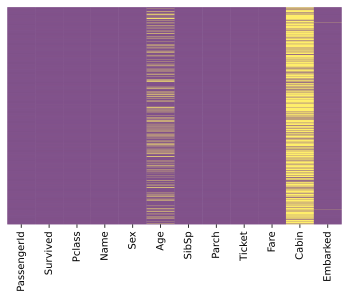

In [ ]:
sns.heatmap(df.isnull(), 
            yticklabels=False, 
            cbar=False, 
            cmap='viridis')

In [ ]:
def split_name(x_df):
    def split_name_series(string):
        firstName, secondName=string.split(', ')
        return pd.Series(
            (firstName, secondName),
            index='firstName secondName'.split()
        )
    # Select the Name column and apply a function
    res=x_df['Name'].apply(split_name_series)
    x_df[res.columns]=res
    return x_df

In [ ]:
res=(
    load_data()
    .pipe(split_name)
)


In [ ]:
res.head()

PassengerId  Survived  ...  firstName                                  secondName
0            1         0  ...     Braund                             Mr. Owen Harris
1            2         1  ...    Cumings  Mrs. John Bradley (Florence Briggs Thayer)
2            3         1  ...  Heikkinen                                 Miss. Laina
3            4         1  ...   Futrelle          Mrs. Jacques Heath (Lily May Peel)
4            5         0  ...      Allen                           Mr. William Henry

[5 rows x 14 columns]

In [ ]:
def substitute_sex(x_df):
    mapping={'male':'M','female':'F'}
    x_df['Sex']=df['Sex'].map(mapping)
    return x_df

In [ ]:
res=(
    load_data()
    .pipe(split_name)
    .pipe(substitute_sex)
)
res.head()

PassengerId  Survived  ...  firstName                                  secondName
0            1         0  ...     Braund                             Mr. Owen Harris
1            2         1  ...    Cumings  Mrs. John Bradley (Florence Briggs Thayer)
2            3         1  ...  Heikkinen                                 Miss. Laina
3            4         1  ...   Futrelle          Mrs. Jacques Heath (Lily May Peel)
4            5         0  ...      Allen                           Mr. William Henry

[5 rows x 14 columns]

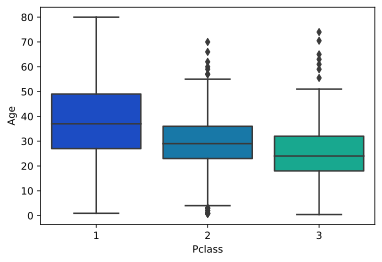

In [ ]:
sns.boxplot(x='Pclass',
            y='Age',
            data=df,
            palette='winter')

In [1]:
pclass_age_map = {
  1: 37,
  2: 29,
  3: 24,
}


In [ ]:
def replace_age_na(x_df, fill_map):
    cond=x_df['Age'].isna()
    res=x_df.loc[cond,'Pclass'].map(fill_map)
    x_df.loc[cond,'Age']=res
    return x_df
    

In [ ]:
res=(
    load_data()
    .pipe(split_name)
    .pipe(substitute_sex)
    .pipe(replace_age_na, pclass_age_map)
)
res.head()

PassengerId  Survived  ...  firstName                                  secondName
0            1         0  ...     Braund                             Mr. Owen Harris
1            2         1  ...    Cumings  Mrs. John Bradley (Florence Briggs Thayer)
2            3         1  ...  Heikkinen                                 Miss. Laina
3            4         1  ...   Futrelle          Mrs. Jacques Heath (Lily May Peel)
4            5         0  ...      Allen                           Mr. William Henry

[5 rows x 14 columns]

In [ ]:
sns.heatmap(res.isnull(), 
            yticklabels=False, 
            cbar=False, 
            cmap='viridis')

In [ ]:
def create_age_group(x_df):
    bins=[0, 13, 19, 61, sys.maxsize]
    labels=['<12', 'Teen', 'Adult', 'Older']
    ageGroup=pd.cut(x_df['Age'], bins=bins, labels=labels)
    x_df['ageGroup']=ageGroup
    return x_df

In [ ]:
res=(
    load_data()
    .pipe(split_name)
    .pipe(substitute_sex)
    .pipe(replace_age_na, pclass_age_map)
    .pipe(create_age_group)
)
res.head()

PassengerId  Survived  ...                                  secondName ageGroup
0            1         0  ...                             Mr. Owen Harris    Adult
1            2         1  ...  Mrs. John Bradley (Florence Briggs Thayer)    Adult
2            3         1  ...                                 Miss. Laina    Adult
3            4         1  ...          Mrs. Jacques Heath (Lily May Peel)    Adult
4            5         0  ...                           Mr. William Henry    Adult

[5 rows x 15 columns]